In [71]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [5]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import networkx.algorithms.community as com
import random

colour = ["black","silver","gray","white","maroon","red","purple","fuchsia","green","lime","olive","yellow","navy","blue","teal","aqua","aliceblue","antiquewhite","aqua","aquamarine","azure","beige","bisque","black","blanchedalmond","blue","blueviolet","brown","burlywood","cadetblue","chartreuse","chocolate","coral","cornflowerblue","cornsilk","crimson","cyan","darkblue","darkcyan","darkgoldenrod","darkgray","darkgreen","darkgrey","darkkhaki","darkmagenta","darkolivegreen","darkorange","darkorchid","darkred","darksalmon","darkseagreen","darkslateblue","darkslategray","darkslategrey","darkturquoise","darkviolet","deeppink","deepskyblue","dimgray","dimgrey","dodgerblue","firebrick","floralwhite","forestgreen","fuchsia","gainsboro","ghostwhite","gold","goldenrod","gray","green","greenyellow","grey","honeydew","hotpink","indianred","indigo","ivory","khaki","lavender","lavenderblush","lawngreen","lemonchiffon","lightblue","lightcoral","lightcyan","lightgoldenrodyellow","lightgray","lightgreen","lightgrey","lightpink","lightsalmon","lightseagreen","lightskyblue","lightslategray","lightslategrey","lightsteelblue","lightyellow","lime","limegreen","linen","magenta","maroon","mediumaquamarine","mediumblue","mediumorchid","mediumpurple","mediumseagreen","mediumslateblue","mediumspringgreen","mediumturquoise","mediumvioletred","midnightblue","mintcream","mistyrose","moccasin","navajowhite","navy","oldlace","olive","olivedrab","orange","orangered","orchid","palegoldenrod","palegreen","paleturquoise","palevioletred","papayawhip","peachpuff","peru","pink","plum","powderblue","purple","red","rosybrown","royalblue","saddlebrown","salmon","sandybrown","seagreen","seashell","sienna","silver","skyblue","slateblue","slategray","slategrey","snow","springgreen","steelblue","tan","teal","thistle","tomato","turquoise","violet","wheat","white","whitesmoke","yellow","yellowgreen"]
random.shuffle(colour)

In [6]:
### Load Graphs
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_karate = nx.read_gml(data_base_path + "graph_karate.gml")
G_karate_rnd = nx.algorithms.smallworld.random_reference(G_karate)
G_dolphins = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_dolphins_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")
G_facebook = nx.read_gml(data_base_path + "graph_facebook.gml")
G_facebook_rnd = nx.read_gml(data_rnd_base_path + "graph_facebook_random.gml")

In [7]:
def find_community_gm(G):
    colour_map = []
    gm = com.greedy_modularity_communities(G)
    for node in G.nodes():
        for i in range(0, len(gm)):
            if node in gm[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(gm)

In [8]:
def find_community_lp(G):
    colour_map = []
    lp = com.label_propagation_communities(G)
    for node in G.nodes():
        for i in range(0, len(lp)):
            if node in list(lp)[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(lp)

In [17]:
def compare_communities(G, G_rnd, title):
    plt.figure(1)
    plt.title("%s_communities_%s" % (title, "greedy modularity maximization"))
    G_gm = find_community_gm(G)
    plt.figure(2)
    plt.title("%s_random_communities_%s" % (title, "greedy modularity maximization"))
    G_rnd_gm = find_community_gm(G_rnd)

    plt.figure(3)
    plt.title("%s_communities_%s" % (title, "label propagation"))
    G_lp = find_community_lp(G)
    plt.figure(4)
    plt.title("%s_random_communities_%s" % (title, "label propagation"))
    G_rnd_lp = find_community_lp(G_rnd)


    print("Number of communities by using greedy modularity maximization before randomisation:", G_gm)
    print("Number of communities by using greedy modularity maximization after randomisation:", G_rnd_gm)
    print("Number of communities by using label propagation algorithm before randomisation:", G_lp)
    print("Number of communities by using label propagation algorithm after randomisation:", G_rnd_lp)


In [10]:
figure_index = 10
def new_fig():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [11]:
## A 4.02
## Task 1
def visualize_ER_graph(avg_k, n_nodes):
    p = np.true_divide(avg_k, n_nodes)
    G_erg=nx.generators.random_graphs.erdos_renyi_graph(n_nodes, p)
    nx.draw(G_erg, pos=nx.spring_layout(G_erg, scale=2),node_size=10)

In [12]:
### A4.02 Task 2
def calculate_ER(N, p):
    temp_NG_N = []
    temp_avg_clustering = []
    for count in range(0,100):
        G_ER = nx.generators.random_graphs.erdos_renyi_graph(N, p)
        largest_nodes = max(nx.connected_components(G_ER), key=len)
        largest_length = len(largest_nodes)
        G_ER_c = nx.clustering(G_ER)
        clustering = [G_ER_c[n] for n in G_ER]
        temp_avg_clustering.append(np.mean(clustering))
        temp_NG_N.append( np.true_divide(largest_length, N))
    # N_g / N , avg_clustering
    return np.mean(temp_NG_N),np.mean(temp_avg_clustering)
def plot_p_NG_N(N):
    x_p = []
    y_NG_N = []
    y_avg_clustering = []
    for i in np.arange(0, 40, 0.1):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    for i in np.arange(40, N+1, 3):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    new_fig()
    plt.title("p - Ng/N")
    plt.xscale("log")
    plt.xlim([0.001, 1])
    plt.axvline(x=1/N, color='r')
    plt.plot(x_p, y_NG_N)

    plt.show()

    new_fig()
    plt.title("p - avg clustering")
    plt.plot(x_p, y_avg_clustering)
    plt.show()

In [32]:
#A04.03 - 1,-2
def generate_ws():
    # avg_clustering_p = []
    # x_p = []
    # y_c_c_p = []
    # x_analysis_p = []
    # analytical_result = []
    #
    # avg_shortest_path_p = []
    # y_d_d_p = []
    # max_p_divider = 1000
 ## run in a long time. So use the data generated through this block as static array for a faster re-run to plot.
    # for i in np.arange(0, max_p_divider+1, 1):
    #     p = i/max_p_divider
        #
        # D_p = []
        # C_p = []
        # for count in range(0,100):
        #     G_sm = nx.watts_strogatz_graph(100, 10, p)
        #
        #     G_node_clustering = nx.clustering(G_sm)
        #     clustering = [G_node_clustering[n] for n in G_sm.nodes()]
        #     C_p.append(np.mean(clustering))
        #
        #     D_p.append(nx.average_shortest_path_length(G_sm))
        #
        # avg_clustering_p.append(np.mean(C_p))
        # avg_shortest_path_p.append(np.mean(D_p))
        #
        # x_p.append(p)
        # x_analysis_p.append(p)

        # y_c_c_p.append(np.true_divide(avg_clustering_p[i], avg_clustering_p[0]))
        # analytical_result.append(( (3/2)*((5-1)/(2*5-1)*(1-p)**3) ) / avg_clustering_p[0])
        # y_d_d_p.append(avg_shortest_path_p[i] / avg_shortest_path_p[0])
    x_p=[0.0, 0.001, 0.002, 0.0030000000000000005, 0.004, 0.005, 0.006000000000000001, 0.007000000000000001, 0.008, 0.009000000000000001, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.795, 0.8, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
    y_c_c_p=[1.0, 0.9976365151515153, 0.994311818181818, 0.9918138203463203, 0.9889601406926405, 0.985831385281385, 0.9826130086580086, 0.979749391441891, 0.9797879978354975, 0.9755239152514151, 0.9718954270729266, 0.9598088636363632, 0.9465374017649014, 0.9331217757242755, 0.9202396719946717, 0.9066639693639689, 0.8928121969696964, 0.8836762121212116, 0.8722610447885444, 0.8536290409590408, 0.8431089360639357, 0.8350648368298365, 0.8192022044622039, 0.8102472519147514, 0.7984929437229434, 0.7826885198135194, 0.7799849217449213, 0.7631214319014314, 0.7484514635364634, 0.7394679953379949, 0.7283173201798198, 0.7226680885780883, 0.7075448026973022, 0.6990413378288376, 0.6869087204462202, 0.6790184490509487, 0.6690626498501496, 0.6565519180819178, 0.6472187516650014, 0.6391112912087908, 0.6302944199183166, 0.6224261971361968, 0.612904897186147, 0.5953070321345318, 0.5889432080419579, 0.5811249679487176, 0.5702434440559437, 0.564169839327339, 0.5557417519980019, 0.5498499713521771, 0.538547386510548, 0.529604032829915, 0.5273467507492504, 0.5102369975857474, 0.5053815838328337, 0.4986163883420499, 0.4911440551115549, 0.48290567887994335, 0.47629174298740445, 0.4672450183150181, 0.46335492556463115, 0.45404169279250134, 0.45177459373959344, 0.4398810432704548, 0.4287539399815869, 0.43344680924467666, 0.41863940155432783, 0.4108678944339972, 0.4052217771199387, 0.3936008168791991, 0.3961631805694303, 0.38551670356604156, 0.38128742931088505, 0.37792633746155785, 0.3713882083112964, 0.36939528187498755, 0.3591094099038215, 0.35608295765508985, 0.3451973656490566, 0.3478663711288709, 0.33380737977708547, 0.3337816551095961, 0.3303925898121485, 0.3220350735049263, 0.3212383384997355, 0.31048741482202, 0.3056872531879884, 0.30440006833852407, 0.30095778639961673, 0.2966595108812754, 0.2870278680633091, 0.2846013590408559, 0.2831742454436687, 0.2804941301345712, 0.27823566622103374, 0.2709827262198584, 0.26452964922332556, 0.2646839949511272, 0.25616915611349417, 0.25744729043015796, 0.2517644284881783, 0.2483174573955455, 0.24266740125070999, 0.23771023236567343, 0.2358778760944936, 0.23891420912420896, 0.23035756491186818, 0.22866939389042318, 0.22413252340796452, 0.22039497675570033, 0.21978756669027555, 0.21822778993065747, 0.2158186211337681, 0.20946272308316022, 0.20919028966003028, 0.2081762813412077, 0.20429756965686519, 0.20193896480970003, 0.20097083049303627, 0.1982797226792814, 0.19534029805978326, 0.19189232945846715, 0.19015757257448426, 0.1873221056368811, 0.18295109719872485, 0.18228599103811555, 0.18284489575826646, 0.18191914497138562, 0.18027496242019064, 0.1796804942490429, 0.17607645492922958, 0.17256929039742497, 0.17423735041918859, 0.16893078365262182, 0.17068902452939208, 0.16612424204923038, 0.16601423329508458, 0.1643966354775255, 0.16295240591709625, 0.16186939873207282, 0.16447742808275306, 0.15909693047148918, 0.16135003725119043, 0.15688057830327556, 0.1566516906261952, 0.15648258829405878, 0.15519399543052395, 0.15531300137942547, 0.15377165325257808, 0.1528941958686308, 0.15217813837220565, 0.15225123564644844, 0.15060793771888578, 0.1483430701445097, 0.14862536393946604, 0.14756316977655984, 0.14809961495934398, 0.14610573702097687, 0.1466986548307213, 0.144552208778064, 0.14512997124650365, 0.14516829881934365, 0.14591836684213613, 0.1443481087578571, 0.14331969414744175, 0.14386570230852735, 0.14191780404708806, 0.14316036771407117, 0.14224813733866748, 0.14076660919575776, 0.1397363089451827, 0.14152857661817023, 0.14126921229827957, 0.14080719121564697, 0.14060991847935342, 0.14125040310051137, 0.14142519804756637, 0.1413106118623378, 0.14155228595449953, 0.14024683743243335, 0.14000973321698934, 0.14134585867950414, 0.13779367453753666, 0.14003029031855654, 0.14012818040189937, 0.138219405700079, 0.14003077383658646, 0.1391888900031856, 0.1380816607502404, 0.13628435960582236, 0.13852081784443618, 0.1392809218026555, 0.13929211676352535, 0.14011599808988734, 0.13836750567157297, 0.14117011715967206, 0.13980594255976214, 0.1389396077284428, 0.13956722007481673, 0.1385735639566831, 0.13938211835764847, 0.13862790058238972, 0.14016791326320732, 0.13983999558491036, 0.13877315480443184, 0.1403266748370308, 0.1380234843510462, 0.13918247806244316, 0.14013010108828214]
    y_d_d_p=[1.0, 0.9627640740740739, 0.9193696296296294, 0.8878499999999998, 0.8549470370370367, 0.8329337037037035, 0.7996133333333331, 0.7828855555555553, 0.7862148148148146, 0.7650096296296295, 0.743916296296296, 0.686555185185185, 0.6515970370370369, 0.6267148148148146, 0.6043907407407405, 0.5868248148148146, 0.5727659259259256, 0.5642437037037036, 0.5562229629629628, 0.5413103703703702, 0.5351644444444442, 0.5290837037037036, 0.5227774074074073, 0.5182492592592591, 0.5140459259259258, 0.5066707407407406, 0.505654074074074, 0.49961370370370356, 0.49448185185185173, 0.4933588888888887, 0.4902770370370369, 0.4873444444444444, 0.483388148148148, 0.48124296296296276, 0.4783588888888887, 0.4759911111111109, 0.4739651851851851, 0.47099518518518513, 0.46988222222222215, 0.46801851851851833, 0.46638296296296283, 0.46459999999999985, 0.46268962962962956, 0.4593718518518517, 0.45856740740740737, 0.45705999999999986, 0.45503962962962957, 0.45432222222222207, 0.45378851851851837, 0.452351111111111, 0.45069037037037035, 0.4493914814814813, 0.4489796296296295, 0.4466085185185184, 0.4459322222222221, 0.44540851851851837, 0.44414777777777764, 0.44260481481481456, 0.4421592592592591, 0.4411648148148146, 0.4402607407407407, 0.4394266666666665, 0.4390555555555555, 0.4375674074074073, 0.43619407407407396, 0.43681444444444434, 0.435505185185185, 0.43428148148148144, 0.4334914814814814, 0.43258259259259246, 0.4327648148148147, 0.4318181481481481, 0.430824074074074, 0.43083296296296286, 0.4299070370370369, 0.42972592592592584, 0.4285544444444443, 0.42813777777777773, 0.42680222222222214, 0.4274329629629629, 0.42606, 0.4261488888888887, 0.4255207407407406, 0.42482703703703695, 0.4248992592592591, 0.42347925925925917, 0.42322111111111105, 0.4229992592592592, 0.4229170370370369, 0.4221392592592592, 0.4214066666666666, 0.4211148148148147, 0.42074925925925916, 0.42050888888888877, 0.4203018518518517, 0.41968777777777766, 0.4190355555555555, 0.41918962962962947, 0.4182359259259259, 0.4185125925925925, 0.4178681481481481, 0.41753999999999986, 0.4168703703703703, 0.4163366666666666, 0.41645111111111094, 0.41658259259259245, 0.415958148148148, 0.4157248148148148, 0.4152537037037036, 0.414684074074074, 0.4147914814814814, 0.4146377777777777, 0.41435148148148143, 0.413868148148148, 0.4136429629629628, 0.4137866666666666, 0.41327259259259247, 0.4129992592592591, 0.4128470370370369, 0.4124407407407406, 0.4123814814814814, 0.4121392592592591, 0.41199481481481465, 0.4116733333333333, 0.41149444444444433, 0.4114362962962962, 0.4111959259259258, 0.4111003703703702, 0.41094999999999987, 0.41091666666666654, 0.4108270370370369, 0.41057111111111094, 0.4105625925925924, 0.41018222222222217, 0.4103399999999999, 0.4100155555555554, 0.40969740740740734, 0.4096529629629629, 0.409532222222222, 0.40951074074074056, 0.4095151851851851, 0.4091829629629629, 0.4094125925925925, 0.4091655555555555, 0.40901925925925914, 0.40896518518518504, 0.4089451851851852, 0.40883296296296284, 0.40870629629629623, 0.4086962962962961, 0.40849222222222215, 0.4086333333333332, 0.4086292592592591, 0.4083507407407407, 0.4085344444444443, 0.4082314814814814, 0.40813777777777765, 0.40825740740740735, 0.40796592592592584, 0.40785888888888877, 0.40803111111111096, 0.40823666666666647, 0.4080985185185184, 0.4079325925925925, 0.4077570370370369, 0.4075929629629628, 0.40792555555555543, 0.4079737037037035, 0.40771962962962954, 0.4077374074074074, 0.4079025925925925, 0.4076925925925925, 0.407685185185185, 0.40770888888888873, 0.4076377777777777, 0.40766666666666657, 0.4077544444444444, 0.4076785185185185, 0.4078729629629628, 0.40760407407407395, 0.4076033333333333, 0.407748148148148, 0.4074329629629629, 0.40742592592592586, 0.40770111111111096, 0.40744666666666657, 0.40776888888888874, 0.4075644444444444, 0.4074625925925925, 0.4075125925925925, 0.40766259259259247, 0.4074822222222221, 0.4075025925925924, 0.4076859259259259, 0.4076085185185185, 0.4077507407407407, 0.407735185185185, 0.40771851851851854, 0.40761, 0.40766333333333316, 0.4076337037037036, 0.4076248148148148, 0.4075118518518516, 0.40759888888888873, 0.4075581481481482, 0.40766222222222215, 0.40742407407407405, 0.40754592592592587, 0.40765962962962954]
    analytical_result= [0.9999999999999996, 0.9970029989999996, 0.9940119919999996, 0.9910269729999995, 0.9880479359999994, 0.9850748749999995, 0.9821077839999995, 0.9791466569999995, 0.9761914879999994, 0.9732422709999995, 0.9702989999999995, 0.9673616689999995, 0.9644302719999995, 0.9615048029999995, 0.9585852559999996, 0.9556716249999995, 0.9527639039999996, 0.9498620869999994, 0.9469661679999996, 0.9440761409999995, 0.9411919999999994, 0.9383137389999995, 0.9354413519999993, 0.9325748329999994, 0.9297141759999995, 0.9268593749999994, 0.9240104239999994, 0.9211673169999995, 0.9183300479999995, 0.9154986109999995, 0.9126729999999995, 0.9098532089999993, 0.9070392319999995, 0.9042310629999994, 0.9014286959999994, 0.8986321249999993, 0.8958413439999994, 0.8930563469999994, 0.8902771279999995, 0.8875036809999994, 0.8847359999999994, 0.8819740789999995, 0.8792179119999994, 0.8764674929999995, 0.8737228159999995, 0.8709838749999994, 0.8682506639999994, 0.8655231769999996, 0.8628014079999995, 0.8600853509999995, 0.8573749999999994, 0.8546703489999995, 0.8519713919999995, 0.8492781229999995, 0.8465905359999994, 0.8439086249999995, 0.8412323839999996, 0.8385618069999994, 0.8358968879999995, 0.8332376209999999, 0.8305839999999995, 0.8279360189999997, 0.8252936719999994, 0.8226569529999997, 0.8200258559999994, 0.8174003749999997, 0.8147805039999995, 0.8121662369999997, 0.8095575679999995, 0.8069544909999997, 0.8043569999999994, 0.8017650889999998, 0.7991787519999998, 0.7965979829999996, 0.7940227759999998, 0.7914531249999996, 0.7888890239999998, 0.7863304669999996, 0.7837774479999998, 0.7812299609999996, 0.7786879999999996, 0.7761515589999997, 0.7736206319999996, 0.7710952129999996, 0.7685752959999996, 0.7660608749999998, 0.7635519439999996, 0.7610484969999997, 0.7585505279999998, 0.7560580309999998, 0.7535709999999997, 0.7510894289999996, 0.7486133119999997, 0.7461426429999998, 0.7436774159999998, 0.7412176249999998, 0.7387632639999998, 0.7363143269999998, 0.7338708079999997, 0.7314327009999997, 0.7289999999999996, 0.7265726989999998, 0.7241507919999998, 0.7217342729999997, 0.7193231359999998, 0.7169173749999997, 0.7145169839999999, 0.7121219569999997, 0.7097322879999997, 0.7073479709999996, 0.7049689999999997, 0.7025953689999997, 0.7002270719999996, 0.6978641029999997, 0.6955064559999996, 0.6931541249999997, 0.6908071039999997, 0.6884653869999998, 0.6861289679999997, 0.6837978409999995, 0.6814719999999996, 0.6791514389999996, 0.6768361519999997, 0.6745261329999996, 0.6722213759999996, 0.6699218749999996, 0.6676276239999995, 0.6653386169999996, 0.6630548479999997, 0.6607763109999998, 0.6585029999999997, 0.6562349089999997, 0.6539720319999996, 0.6517143629999996, 0.6494618959999996, 0.6472146249999996, 0.6449725439999996, 0.6427356469999996, 0.6405039279999997, 0.6382773809999996, 0.6360559999999996, 0.6338397789999997, 0.6316287119999996, 0.6294227929999996, 0.6272220159999996, 0.6250263749999997, 0.6228358639999996, 0.6206504769999998, 0.6184702079999996, 0.6162950509999997, 0.6141249999999996, 0.6119600489999996, 0.6098001919999996, 0.6076454229999996, 0.6054957359999997, 0.6033511249999998, 0.6012115839999997, 0.5990771069999997, 0.5969476879999996, 0.5948233209999997, 0.5927039999999997, 0.5905897189999997, 0.5884804719999996, 0.5863762529999997, 0.5842770559999996, 0.5821828749999995, 0.5800937039999996, 0.5780095369999996, 0.5759303679999996, 0.5738561909999996, 0.5717869999999996, 0.5697227889999997, 0.567663552, 0.5656092829999996, 0.563559976, 0.5615156249999997, 0.559476224, 0.5574417669999997, 0.5554122479999999, 0.5533876609999997, 0.5513679999999999, 0.5493532589999995, 0.5473434319999999, 0.5453385129999996, 0.543338496, 0.5413433749999996, 0.5393531439999998, 0.5373677969999997, 0.5353873279999999, 0.5334117309999995, 0.5314409999999997, 0.5294751289999997, 0.5275141119999999, 0.5255579429999997, 0.5236066159999999, 0.5216601249999997, 0.5197184639999999, 0.5177816269999996, 0.5158496079999999, 0.5139224009999995, 0.5119999999999998, 0.5100823989999995, 0.5081695919999999, 0.5062615729999996, 0.5043583359999999, 0.5024598749999999, 0.5005661839999999, 0.4986772569999999, 0.4967930879999998, 0.4949136709999998, 0.49303899999999984, 0.49116906899999985, 0.4893038719999998, 0.4874434029999998, 0.48558765599999976, 0.48373662499999975, 0.48189030399999977, 0.4800486869999998, 0.4782117679999998, 0.4763795409999998, 0.47455199999999975, 0.47272913899999974, 0.47091095199999977, 0.46909743299999984, 0.4672885759999998, 0.4654843749999998, 0.46368482399999983, 0.46188991699999976, 0.46009964799999975, 0.4583140109999998, 0.45653299999999974, 0.45475660899999976, 0.4529848319999998, 0.4512176629999998, 0.4494550959999997, 0.4476971249999998, 0.44594374399999975, 0.44419494699999973, 0.4424507279999998, 0.4407110809999998, 0.4389759999999998, 0.4372454789999998, 0.4355195119999998, 0.4337980929999998, 0.43208121599999977, 0.43036887499999976, 0.42866106399999976, 0.42695777699999976, 0.42525900799999977, 0.42356475099999985, 0.42187499999999983, 0.42018974899999983, 0.41850899199999986, 0.4168327229999998, 0.4151609359999998, 0.41349362499999975, 0.4118307839999998, 0.4101724069999998, 0.4085184879999998, 0.4068690209999998, 0.40522399999999975, 0.40358341899999983, 0.4019472719999998, 0.4003155529999998, 0.39868825599999974, 0.3970653749999998, 0.39544690399999977, 0.39383283699999977, 0.3922231679999998, 0.39061789099999983, 0.3890169999999997, 0.38742048899999976, 0.38582835199999976, 0.38424058299999975, 0.38265717599999977, 0.38107812499999977, 0.37950342399999976, 0.37793306699999973, 0.37636704799999976, 0.3748053609999997, 0.3732479999999998, 0.37169495899999977, 0.3701462319999998, 0.36860181299999994, 0.36706169599999977, 0.36552587499999994, 0.3639943439999998, 0.36246709699999996, 0.36094412799999975, 0.35942543099999996, 0.35791099999999976, 0.35640082899999986, 0.3548949119999998, 0.35339324299999997, 0.3518958159999997, 0.3504026249999999, 0.3489136639999998, 0.347428927, 0.3459484079999998, 0.3444721009999999, 0.3429999999999998, 0.341532099, 0.3400683919999998, 0.3386088729999999, 0.33715353599999975, 0.33570237499999994, 0.33425538399999977, 0.3328125569999999, 0.3313738879999998, 0.3299393709999999, 0.3285089999999998, 0.32708276899999994, 0.32566067199999976, 0.3242427029999999, 0.32282885599999983, 0.3214191249999999, 0.3200135039999997, 0.31861198699999993, 0.31721456799999975, 0.3158212409999999, 0.31443199999999977, 0.3130468389999999, 0.31166575199999974, 0.3102887329999999, 0.30891577599999975, 0.3075468749999999, 0.3061820239999998, 0.30482121699999987, 0.3034644479999997, 0.30211171099999995, 0.3007629999999998, 0.2994183089999999, 0.29807763199999976, 0.29674096299999986, 0.29540829599999974, 0.29407962499999996, 0.2927549439999998, 0.2914342469999999, 0.29011752799999974, 0.2888047809999999, 0.28749599999999975, 0.2861911789999999, 0.2848903119999997, 0.28359339299999986, 0.2823004159999999, 0.2810113749999999, 0.27972626399999995, 0.27844507699999993, 0.27716780799999985, 0.2758944509999999, 0.27462499999999984, 0.2733594489999999, 0.2720977919999999, 0.27084002299999993, 0.26958613599999987, 0.2683361249999999, 0.2670899839999999, 0.26584770699999993, 0.2646092879999999, 0.2633747209999999, 0.2621439999999999, 0.2609171189999999, 0.2596940719999999, 0.2584748529999999, 0.2572594559999999, 0.2560478749999999, 0.2548401039999999, 0.2536361369999999, 0.25243596799999984, 0.2512395909999998, 0.2500469999999999, 0.2488581889999999, 0.2476731519999999, 0.24649188299999988, 0.24531437599999986, 0.2441406249999999, 0.24297062399999989, 0.24180436699999985, 0.24064184799999988, 0.23948306099999989, 0.23832799999999987, 0.23717665899999987, 0.2360290319999999, 0.23488511299999984, 0.23374489599999987, 0.23260837499999984, 0.23147554399999984, 0.23034639699999987, 0.22922092799999985, 0.22809913099999987, 0.22698099999999988, 0.22586652899999987, 0.22475571199999986, 0.22364854299999984, 0.22254501599999987, 0.22144512499999988, 0.22034886399999987, 0.21925622699999986, 0.2181672079999999, 0.21708180099999985, 0.2159999999999999, 0.21492179899999986, 0.21384719199999985, 0.21277617299999987, 0.2117087359999999, 0.2106448749999999, 0.20958458399999988, 0.20852785699999987, 0.20747468799999996, 0.20642507099999988, 0.205379, 0.20433646899999985, 0.203297472, 0.20226200299999988, 0.201230056, 0.20020162499999986, 0.19917670399999998, 0.19815528699999987, 0.19713736799999995, 0.19612294099999988, 0.19511199999999995, 0.19410453899999988, 0.19310055199999995, 0.19210003299999984, 0.19110297599999995, 0.19010937499999989, 0.18911922399999995, 0.18813251699999983, 0.187149248, 0.18616941099999984, 0.18519299999999997, 0.18422000899999988, 0.18325043199999996, 0.18228426299999984, 0.18132149599999994, 0.18036212499999987, 0.17940614399999996, 0.17845354699999985, 0.17750432799999996, 0.17655848099999982, 0.17561599999999994, 0.17467687899999984, 0.17374111199999995, 0.17280869299999985, 0.17187961599999996, 0.17095387499999987, 0.170031464, 0.16911237699999984, 0.16819660799999997, 0.16728415099999985, 0.16637499999999997, 0.16546914899999984, 0.16456659199999996, 0.1636673229999999, 0.16277133599999996, 0.16187862499999986, 0.16098918399999995, 0.16010300699999985, 0.15922008799999995, 0.15834042099999984, 0.15746399999999994, 0.15659081899999985, 0.15572087199999995, 0.15485415299999988, 0.15399065599999995, 0.15313037499999985, 0.15227330399999994, 0.15141943699999988, 0.15056876799999994, 0.14972129099999998, 0.14887699999999995, 0.14803588899999995, 0.14719795199999997, 0.14636318299999992, 0.14553157599999994, 0.14470312499999996, 0.14387782399999993, 0.14305566699999994, 0.14223664799999997, 0.14142076099999995, 0.14060799999999993, 0.13979835899999993, 0.13899183199999995, 0.13818841299999993, 0.13738809599999993, 0.13659087499999994, 0.13579674399999994, 0.13500569699999992, 0.13421772799999993, 0.13343283099999995, 0.13265099999999996, 0.13187222899999995, 0.13109651199999994, 0.13032384299999994, 0.12955421599999994, 0.12878762499999996, 0.12802406399999994, 0.12726352699999996, 0.12650600799999995, 0.1257515009999999, 0.12499999999999994, 0.12425149899999995, 0.12350599199999993, 0.12276347299999994, 0.12202393599999993, 0.12128737499999993, 0.12055378399999994, 0.11982315699999994, 0.11909548799999994, 0.11837077099999994, 0.11764899999999992, 0.11693016899999992, 0.11621427199999994, 0.11550130299999993, 0.11479125599999994, 0.11408412499999994, 0.11337990399999993, 0.11267858699999993, 0.11198016799999992, 0.11128464099999993, 0.11059199999999993, 0.10990223899999993, 0.10921535199999993, 0.10853133299999992, 0.10785017599999994, 0.10717187499999993, 0.10649642399999994, 0.10582381699999993, 0.10515404799999994, 0.10448711099999994, 0.10382299999999994, 0.10316170899999992, 0.10250323199999993, 0.10184756299999993, 0.10119469599999993, 0.10054462499999993, 0.09989734399999993, 0.09925284699999994, 0.09861112799999994, 0.09797218099999994, 0.09733599999999994, 0.09670257899999994, 0.09607191199999993, 0.09544399299999994, 0.09481881599999993, 0.09419637499999992, 0.09357666399999992, 0.09295967699999994, 0.09234540799999993, 0.09173385099999992, 0.09112499999999994, 0.09051884899999992, 0.08991539199999993, 0.08931462299999993, 0.08871653599999993, 0.08812112499999991, 0.08752838399999993, 0.08693830699999994, 0.08635088799999992, 0.08576612099999993, 0.08518399999999994, 0.08460451899999993, 0.08402767199999991, 0.08345345299999998, 0.08288185599999999, 0.08231287499999998, 0.08174650399999998, 0.081182737, 0.08062156799999999, 0.08006299099999999, 0.079507, 0.07895358899999999, 0.07840275199999998, 0.077854483, 0.077308776, 0.07676562499999999, 0.076225024, 0.07568696699999998, 0.075151448, 0.07461846099999998, 0.07408799999999997, 0.07356005899999998, 0.07303463199999999, 0.07251171299999999, 0.071991296, 0.07147337499999999, 0.070957944, 0.070444997, 0.069934528, 0.06942653099999999, 0.06892099999999998, 0.06841792899999999, 0.067917312, 0.06741914299999997, 0.06692341599999999, 0.06643012499999996, 0.06593926399999998, 0.06545082699999999, 0.06496480799999999, 0.06448120099999999, 0.06399999999999997, 0.06352119899999999, 0.06304479199999999, 0.06257077299999998, 0.06209913599999998, 0.06162987499999998, 0.061162983999999976, 0.06069845699999997, 0.06023628799999997, 0.05977647099999998, 0.05931899999999997, 0.05886386899999997, 0.058411071999999974, 0.05796060299999998, 0.05751245599999997, 0.05706662499999997, 0.05662310399999997, 0.056181886999999965, 0.05574296799999997, 0.055306340999999974, 0.054871999999999976, 0.05443993899999997, 0.05401015199999997, 0.05358263299999997, 0.05315737599999997, 0.05273437499999998, 0.05231362399999998, 0.05189511699999998, 0.05147884799999997, 0.051064810999999974, 0.05065299999999997, 0.050243408999999975, 0.04983603199999997, 0.04943086299999997, 0.049027895999999974, 0.048627124999999966, 0.04822854399999997, 0.04783214699999997, 0.04743792799999997, 0.04704588099999997, 0.046655999999999975, 0.046268278999999975, 0.04588271199999997, 0.045499292999999975, 0.04511801599999997, 0.04473887499999997, 0.04436186399999997, 0.04398697699999996, 0.043614207999999974, 0.04324355099999998, 0.042874999999999976, 0.04250854899999997, 0.04214419199999997, 0.04178192299999997, 0.04142173599999997, 0.04106362499999997, 0.04070758399999997, 0.04035360699999998, 0.040001687999999966, 0.03965182099999997, 0.03930399999999997, 0.03895821899999997, 0.03861447199999997, 0.03827275299999997, 0.037933055999999965, 0.03759537499999997, 0.03725970399999997, 0.03692603699999997, 0.036594367999999974, 0.03626469099999997, 0.03593699999999997, 0.03561128899999996, 0.03528755199999997, 0.03496578299999997, 0.034645975999999974, 0.03432812499999997, 0.03401222399999997, 0.03369826699999996, 0.03338624799999997, 0.033076160999999965, 0.032767999999999964, 0.03246175899999997, 0.03215743199999997, 0.03185501299999997, 0.031554495999999974, 0.03125587499999997, 0.030959143999999966, 0.03066429699999997, 0.030371328, 0.030080231, 0.029791, 0.029503629, 0.029218111999999997, 0.028934443, 0.028652616, 0.028372624999999995, 0.028094464, 0.027818126999999998, 0.027543607999999994, 0.027270900999999997, 0.027000000000000003, 0.026730899000000002, 0.026463591999999998, 0.026198073000000002, 0.025934335999999995, 0.025672375, 0.025412184, 0.025153757, 0.024897087999999998, 0.024642170999999994, 0.024388999999999994, 0.024137568999999994, 0.023887871999999994, 0.023639902999999993, 0.023393656, 0.023149124999999996, 0.022906303999999995, 0.022665186999999993, 0.022425767999999995, 0.022188040999999995, 0.021951999999999992, 0.021717638999999993, 0.021484951999999995, 0.021253933, 0.021024575999999996, 0.020796874999999996, 0.020570823999999995, 0.020346416999999995, 0.020123647999999994, 0.019902510999999994, 0.019682999999999992, 0.019465108999999994, 0.019248831999999994, 0.019034162999999993, 0.018821095999999992, 0.018609624999999994, 0.018399743999999996, 0.018191446999999993, 0.01798472799999999, 0.017779580999999996, 0.01757599999999999, 0.017373978999999994, 0.01717351199999999, 0.016974592999999993, 0.01677721599999999, 0.016581374999999995, 0.016387063999999993, 0.016194276999999993, 0.016003007999999992, 0.015813250999999993, 0.015624999999999993, 0.01543824899999999, 0.015252991999999991, 0.015069222999999993, 0.014886935999999993, 0.01470612499999999, 0.014526783999999992, 0.014348906999999992, 0.014172487999999992, 0.01399752099999999, 0.01382399999999999, 0.013651918999999992, 0.013481271999999992, 0.013312052999999992, 0.013144255999999993, 0.012977874999999993, 0.012812903999999991, 0.012649336999999991, 0.012487167999999991, 0.012326390999999992, 0.012166999999999992, 0.01200898899999999, 0.011852351999999991, 0.01169708299999999, 0.011543175999999992, 0.011390624999999993, 0.011239423999999991, 0.011089566999999991, 0.010941047999999991, 0.01079386099999999, 0.010647999999999993, 0.01050345899999999, 0.01036023199999999, 0.010218312999999991, 0.01007769599999999, 0.00993837499999999, 0.009800343999999989, 0.00966359699999999, 0.009528127999999992, 0.00939393099999999, 0.00926099999999999, 0.009129328999999992, 0.00899891199999999, 0.00886974299999999, 0.00874181599999999, 0.008615124999999989, 0.00848966399999999, 0.008365426999999991, 0.00824240799999999, 0.008120600999999991, 0.007999999999999991, 0.007880598999999992, 0.007762391999999991, 0.007645372999999991, 0.007529535999999991, 0.007414874999999991, 0.007301383999999991, 0.007189056999999991, 0.00707788799999999, 0.006967870999999991, 0.00685899999999999, 0.006751268999999991, 0.006644671999999991, 0.006539203000000002, 0.006434856000000002, 0.006331625000000003, 0.006229504000000002, 0.006128487000000002, 0.0060285680000000015, 0.005929741000000001, 0.005832000000000001, 0.005735339000000001, 0.005639752000000002, 0.005545233000000001, 0.005451776000000002, 0.005359375000000001, 0.005268024000000001, 0.005177717000000001, 0.0050884480000000015, 0.005000211000000001, 0.004913000000000002, 0.004826809000000001, 0.004741632000000001, 0.004657463000000001, 0.004574296, 0.0044921250000000005, 0.004410944000000001, 0.004330747, 0.004251528000000001, 0.004173281000000001, 0.004096000000000001, 0.004019679000000001, 0.003944312, 0.0038698930000000006, 0.003796416, 0.003723875, 0.0036522639999999997, 0.003581577, 0.003511808, 0.0034429509999999992, 0.0033750000000000004, 0.0033079489999999997, 0.0032417919999999994, 0.003176523, 0.0031121359999999997, 0.0030486249999999993, 0.0029859839999999993, 0.002924207, 0.0028632879999999994, 0.0028032209999999994, 0.002743999999999999, 0.0026856189999999993, 0.0026280719999999995, 0.0025713529999999993, 0.0025154559999999992, 0.002460374999999999, 0.002406103999999999, 0.002352636999999999, 0.0022999679999999995, 0.002248090999999999, 0.002196999999999999, 0.002146688999999999, 0.002097151999999999, 0.002048382999999999, 0.002000375999999999, 0.0019531249999999991, 0.001906623999999999, 0.0018608669999999991, 0.001815847999999999, 0.001771560999999999, 0.0017279999999999989, 0.001685158999999999, 0.0016430319999999991, 0.001601612999999999, 0.001560895999999999, 0.001520874999999999, 0.001481543999999999, 0.001442896999999999, 0.0014049279999999989, 0.001367630999999999, 0.001330999999999999, 0.0012950289999999988, 0.0012597119999999988, 0.0012250429999999986, 0.001191015999999999, 0.0011576249999999987, 0.0011248639999999989, 0.0010927269999999989, 0.0010612079999999988, 0.0010303009999999987, 0.000999999999999999, 0.0009702989999999989, 0.0009411919999999989, 0.0009126729999999988, 0.0008847359999999987, 0.0008573749999999988, 0.0008305839999999989, 0.0008043569999999989, 0.000778687999999999, 0.0007535709999999988, 0.0007289999999999991, 0.0007049689999999989, 0.0006814719999999989, 0.0006585029999999989, 0.0006360559999999989, 0.0006141249999999989, 0.0005927039999999989, 0.0005717869999999991, 0.0005513679999999989, 0.0005314409999999989, 0.000511999999999999, 0.000493038999999999, 0.000474551999999999, 0.000456532999999999, 0.000438975999999999, 0.0004218749999999991, 0.0004052239999999991, 0.00038901699999999904, 0.0003732479999999991, 0.0003579109999999991, 0.0003429999999999991, 0.00032850899999999913, 0.00031443199999999915, 0.00030076299999999914, 0.0002874959999999992, 0.0002746249999999992, 0.0002621439999999992, 0.00025004699999999923, 0.00023832800000000051, 0.00022698100000000048, 0.00021600000000000048, 0.00020537900000000046, 0.00019511200000000043, 0.00018519300000000038, 0.00017561600000000037, 0.00016637500000000037, 0.00015746400000000033, 0.0001488770000000003, 0.00014060800000000032, 0.0001326510000000003, 0.00012500000000000027, 0.00011764900000000026, 0.00011059200000000024, 0.00010382300000000023, 9.733600000000022e-05, 9.11250000000002e-05, 8.518400000000019e-05, 7.950700000000019e-05, 7.408800000000016e-05, 6.892100000000015e-05, 6.400000000000013e-05, 5.931900000000012e-05, 5.487200000000012e-05, 5.065300000000011e-05, 4.66560000000001e-05, 4.2875000000000093e-05, 3.930400000000008e-05, 3.593700000000007e-05, 3.2768000000000077e-05, 2.9791000000000064e-05, 2.700000000000006e-05, 2.4389000000000054e-05, 2.1952000000000047e-05, 1.9683000000000042e-05, 1.757600000000004e-05, 1.5625000000000034e-05, 1.382400000000003e-05, 1.2167000000000028e-05, 1.0648000000000024e-05, 9.26100000000002e-06, 8.000000000000017e-06, 6.859000000000015e-06, 5.832000000000012e-06, 4.91300000000001e-06, 4.0960000000000096e-06, 3.3750000000000075e-06, 2.744000000000006e-06, 2.197000000000005e-06, 1.7280000000000038e-06, 1.331000000000003e-06, 1.000000000000002e-06, 7.290000000000015e-07, 5.120000000000012e-07, 3.4300000000000073e-07, 2.1600000000000048e-07, 1.2500000000000026e-07, 6.400000000000015e-08, 2.700000000000006e-08, 8.000000000000019e-09, 1.0000000000000023e-09, 0.0]
    x_analysis_p = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149, 0.15, 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16, 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18, 0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189, 0.19, 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198, 0.199, 0.2, 0.201, 0.202, 0.203, 0.204, 0.205, 0.206, 0.207, 0.208, 0.209, 0.21, 0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217, 0.218, 0.219, 0.22, 0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.229, 0.23, 0.231, 0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24, 0.241, 0.242, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.25, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26, 0.261, 0.262, 0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269, 0.27, 0.271, 0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278, 0.279, 0.28, 0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287, 0.288, 0.289, 0.29, 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3, 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31, 0.311, 0.312, 0.313, 0.314, 0.315, 0.316, 0.317, 0.318, 0.319, 0.32, 0.321, 0.322, 0.323, 0.324, 0.325, 0.326, 0.327, 0.328, 0.329, 0.33, 0.331, 0.332, 0.333, 0.334, 0.335, 0.336, 0.337, 0.338, 0.339, 0.34, 0.341, 0.342, 0.343, 0.344, 0.345, 0.346, 0.347, 0.348, 0.349, 0.35, 0.351, 0.352, 0.353, 0.354, 0.355, 0.356, 0.357, 0.358, 0.359, 0.36, 0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369, 0.37, 0.371, 0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.38, 0.381, 0.382, 0.383, 0.384, 0.385, 0.386, 0.387, 0.388, 0.389, 0.39, 0.391, 0.392, 0.393, 0.394, 0.395, 0.396, 0.397, 0.398, 0.399, 0.4, 0.401, 0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408, 0.409, 0.41, 0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417, 0.418, 0.419, 0.42, 0.421, 0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428, 0.429, 0.43, 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437, 0.438, 0.439, 0.44, 0.441, 0.442, 0.443, 0.444, 0.445, 0.446, 0.447, 0.448, 0.449, 0.45, 0.451, 0.452, 0.453, 0.454, 0.455, 0.456, 0.457, 0.458, 0.459, 0.46, 0.461, 0.462, 0.463, 0.464, 0.465, 0.466, 0.467, 0.468, 0.469, 0.47, 0.471, 0.472, 0.473, 0.474, 0.475, 0.476, 0.477, 0.478, 0.479, 0.48, 0.481, 0.482, 0.483, 0.484, 0.485, 0.486, 0.487, 0.488, 0.489, 0.49, 0.491, 0.492, 0.493, 0.494, 0.495, 0.496, 0.497, 0.498, 0.499, 0.5, 0.501, 0.502, 0.503, 0.504, 0.505, 0.506, 0.507, 0.508, 0.509, 0.51, 0.511, 0.512, 0.513, 0.514, 0.515, 0.516, 0.517, 0.518, 0.519, 0.52, 0.521, 0.522, 0.523, 0.524, 0.525, 0.526, 0.527, 0.528, 0.529, 0.53, 0.531, 0.532, 0.533, 0.534, 0.535, 0.536, 0.537, 0.538, 0.539, 0.54, 0.541, 0.542, 0.543, 0.544, 0.545, 0.546, 0.547, 0.548, 0.549, 0.55, 0.551, 0.552, 0.553, 0.554, 0.555, 0.556, 0.557, 0.558, 0.559, 0.56, 0.561, 0.562, 0.563, 0.564, 0.565, 0.566, 0.567, 0.568, 0.569, 0.57, 0.571, 0.572, 0.573, 0.574, 0.575, 0.576, 0.577, 0.578, 0.579, 0.58, 0.581, 0.582, 0.583, 0.584, 0.585, 0.586, 0.587, 0.588, 0.589, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6, 0.601, 0.602, 0.603, 0.604, 0.605, 0.606, 0.607, 0.608, 0.609, 0.61, 0.611, 0.612, 0.613, 0.614, 0.615, 0.616, 0.617, 0.618, 0.619, 0.62, 0.621, 0.622, 0.623, 0.624, 0.625, 0.626, 0.627, 0.628, 0.629, 0.63, 0.631, 0.632, 0.633, 0.634, 0.635, 0.636, 0.637, 0.638, 0.639, 0.64, 0.641, 0.642, 0.643, 0.644, 0.645, 0.646, 0.647, 0.648, 0.649, 0.65, 0.651, 0.652, 0.653, 0.654, 0.655, 0.656, 0.657, 0.658, 0.659, 0.66, 0.661, 0.662, 0.663, 0.664, 0.665, 0.666, 0.667, 0.668, 0.669, 0.67, 0.671, 0.672, 0.673, 0.674, 0.675, 0.676, 0.677, 0.678, 0.679, 0.68, 0.681, 0.682, 0.683, 0.684, 0.685, 0.686, 0.687, 0.688, 0.689, 0.69, 0.691, 0.692, 0.693, 0.694, 0.695, 0.696, 0.697, 0.698, 0.699, 0.7, 0.701, 0.702, 0.703, 0.704, 0.705, 0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716, 0.717, 0.718, 0.719, 0.72, 0.721, 0.722, 0.723, 0.724, 0.725, 0.726, 0.727, 0.728, 0.729, 0.73, 0.731, 0.732, 0.733, 0.734, 0.735, 0.736, 0.737, 0.738, 0.739, 0.74, 0.741, 0.742, 0.743, 0.744, 0.745, 0.746, 0.747, 0.748, 0.749, 0.75, 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758, 0.759, 0.76, 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767, 0.768, 0.769, 0.77, 0.771, 0.772, 0.773, 0.774, 0.775, 0.776, 0.777, 0.778, 0.779, 0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, 0.787, 0.788, 0.789, 0.79, 0.791, 0.792, 0.793, 0.794, 0.795, 0.796, 0.797, 0.798, 0.799, 0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.813, 0.814, 0.815, 0.816, 0.817, 0.818, 0.819, 0.82, 0.821, 0.822, 0.823, 0.824, 0.825, 0.826, 0.827, 0.828, 0.829, 0.83, 0.831, 0.832, 0.833, 0.834, 0.835, 0.836, 0.837, 0.838, 0.839, 0.84, 0.841, 0.842, 0.843, 0.844, 0.845, 0.846, 0.847, 0.848, 0.849, 0.85, 0.851, 0.852, 0.853, 0.854, 0.855, 0.856, 0.857, 0.858, 0.859, 0.86, 0.861, 0.862, 0.863, 0.864, 0.865, 0.866, 0.867, 0.868, 0.869, 0.87, 0.871, 0.872, 0.873, 0.874, 0.875, 0.876, 0.877, 0.878, 0.879, 0.88, 0.881, 0.882, 0.883, 0.884, 0.885, 0.886, 0.887, 0.888, 0.889, 0.89, 0.891, 0.892, 0.893, 0.894, 0.895, 0.896, 0.897, 0.898, 0.899, 0.9, 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, 0.907, 0.908, 0.909, 0.91, 0.911, 0.912, 0.913, 0.914, 0.915, 0.916, 0.917, 0.918, 0.919, 0.92, 0.921, 0.922, 0.923, 0.924, 0.925, 0.926, 0.927, 0.928, 0.929, 0.93, 0.931, 0.932, 0.933, 0.934, 0.935, 0.936, 0.937, 0.938, 0.939, 0.94, 0.941, 0.942, 0.943, 0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.95, 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96, 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97, 0.971, 0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98, 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0]
    plt.figure(1)
    plt.title("<C(p)>/<C(0)> - p")
    # plt.xscale("log")
    red = mpatches.Patch(color='red', label='analytical_result')
    blue = mpatches.Patch(color='blue', label='actual_result')
    plt.xlabel("p")
    plt.ylabel("<C(p)>/<C(0)>")
    plt.xlim([min(x_p), max(x_p)])
    plt.plot(x_p, y_c_c_p)
    plt.plot(x_analysis_p, analytical_result)
    plt.legend(handles=(blue, red),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

    plt.figure(2)
    plt.title("<D(p)>/<D(0)> - p")
    plt.xscale("log")
    plt.xlabel("p")
    plt.ylabel("D(p)/D(0)")
    plt.plot(x_p, y_d_d_p, '-g')
# generate_ws()

### Output Preview

#### A04.1

##### Karate

Number of communities by using greedy modularity maximization before randomisation: 3
Number of communities by using greedy modularity maximization after randomisation: 5
Number of communities by using label propagation algorithm before randomisation: 3
Number of communities by using label propagation algorithm after randomisation: 1


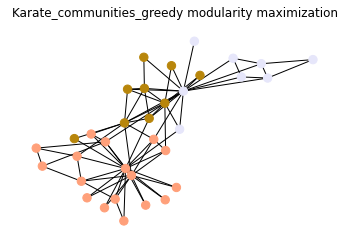

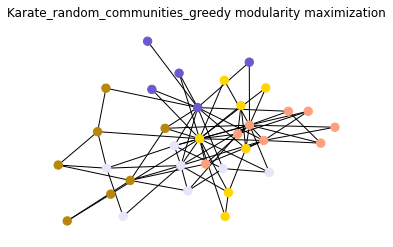

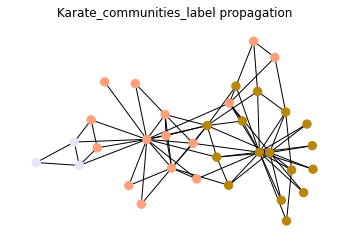

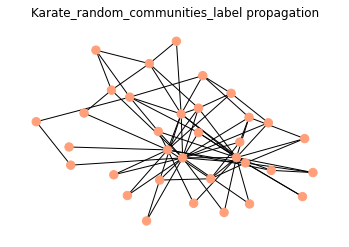

In [18]:
compare_communities(G_karate, G_karate_rnd, "Karate")

##### dolphins

Number of communities by using greedy modularity maximization before randomisation: 4
Number of communities by using greedy modularity maximization after randomisation: 6
Number of communities by using label propagation algorithm before randomisation: 6
Number of communities by using label propagation algorithm after randomisation: 1


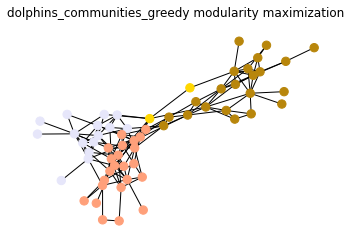

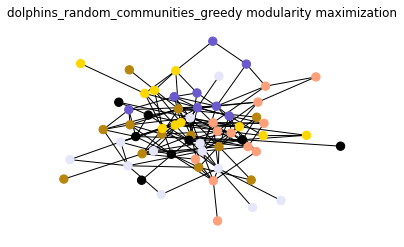

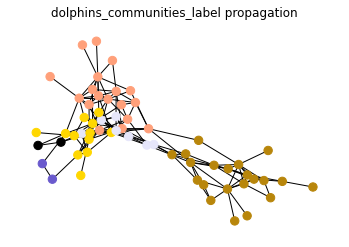

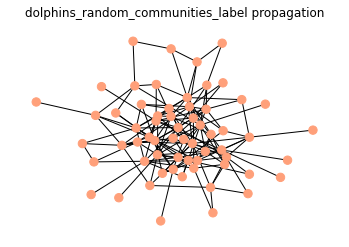

In [19]:
compare_communities(G_dolphins, G_dolphins_rnd, "dolphins")

##### Facebook

Number of communities by using greedy modularity maximization before randomisation: 13
Number of communities by using greedy modularity maximization after randomisation: 21
Number of communities by using label propagation algorithm before randomisation: 44
Number of communities by using label propagation algorithm after randomisation: 3


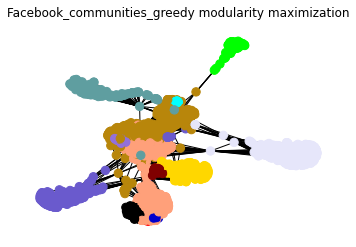

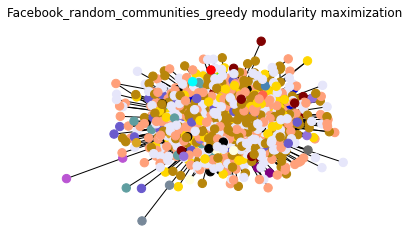

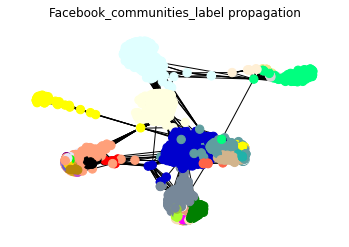

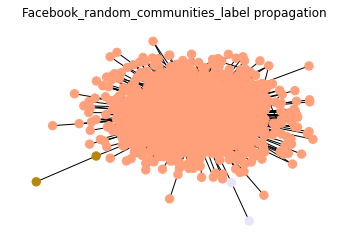

In [20]:
compare_communities(G_facebook, G_facebook_rnd, "Facebook")

#### A04.2 Task 1

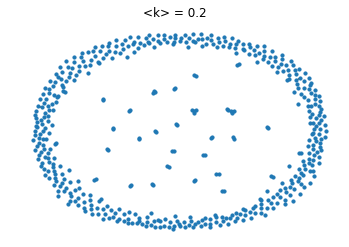

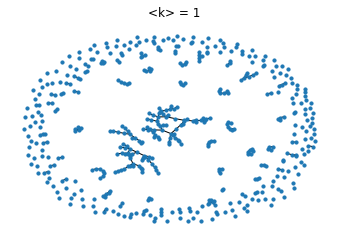

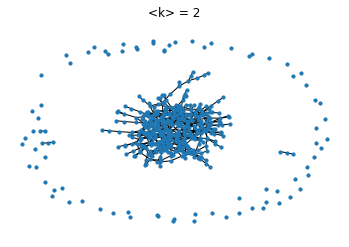

In [84]:
for avg_k in [0.2, 1 ,2]:
    new_fig()
    plt.title("<k> = " + str(avg_k))
    visualize_ER_graph(avg_k, 500)

#### A04.2_Task 2
(PS. log scale here cannot start from 0, so it starts from 10^-3)

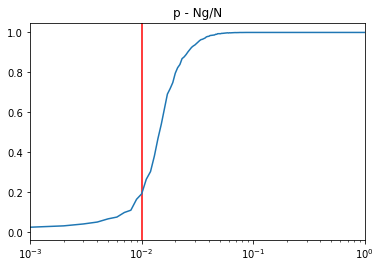

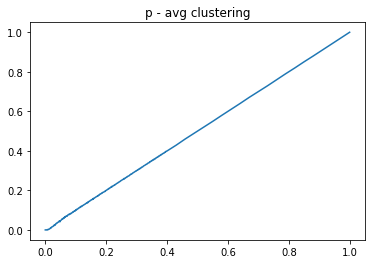

In [85]:
plot_p_NG_N(100)

#### A04.2 Task 2 - 2 Explanation
Clustering coefficient represents the possibility that two of the node's neighbors are linked.
ER is generated through the possibility of edge creation probability p.
So it means the possibility of any two nodes are connected is p.
Say a node with k degree, the clustering coefficient's expectation is 1/k(k-1)) * (k(k-1) * p) = p.
Note that k(k-1) * p is the number of edges between this node's neighbors on average, where k(k-1) is the amount of all possible edges.
So the average of clustering coefficients is just equal to p.

#### A04.3
(In log scale x cannot start from 0, so it use 10^-3 as starting point in log scale. )

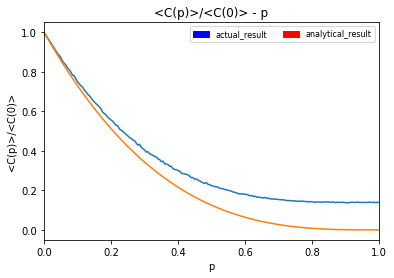

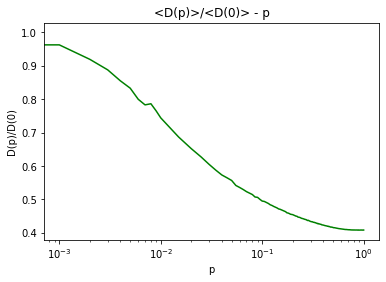

In [33]:
generate_ws()